In [22]:
import os
import tensorflow as tf
import numpy as np

from basenetwork import set_flattened_weights
from derivativelayer import DerivativeLayer
from basenetwork import Network
from PINN import PINNModel
from optimizer import Optimizer
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
from data_prep import data_prep
from plottingtools import plot_contour
import pickle
"""
We will solve the equation between 0 and Xmax and 0 and Tmax
"""

#Global Parameters for training
N_col = 10000 #Number of collocation points
N_bound_ini = 100 #total number of boundary and initial condition points
N_test_points = 1000

basemodel = Network.basemodel()
GridStabilityPINN = PINNModel(basemodel).build()
x_train, y_train = data_prep(N_col = 100, N_ini = 300)

optimizer = Optimizer(model=GridStabilityPINN, x_train=x_train, y_train=y_train,maxiter= 20)
optimizer.fit(20)

Optimizer: L_BFGS Optimizer for 20 iterations
c:\Users\joshb\Desktop\Machine_Learning\GridStabilityPINN\optimizer.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.model.set_weights(np.array(new_weights))
1/1 [==============================] - 0s 17ms/step - loss: 0.0013


In [28]:
optimizer.fit(1000)      

Optimizer: L_BFGS Optimizer for 1000 iterations
1/1 [==============================] - 0s 13ms/step


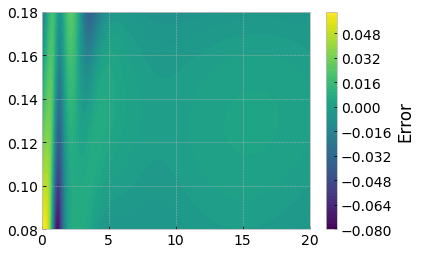

In [30]:
from plottingtools import ErrorPlot
ErrorPlot(GridStabilityPINN, m=0.2, d=0.15)

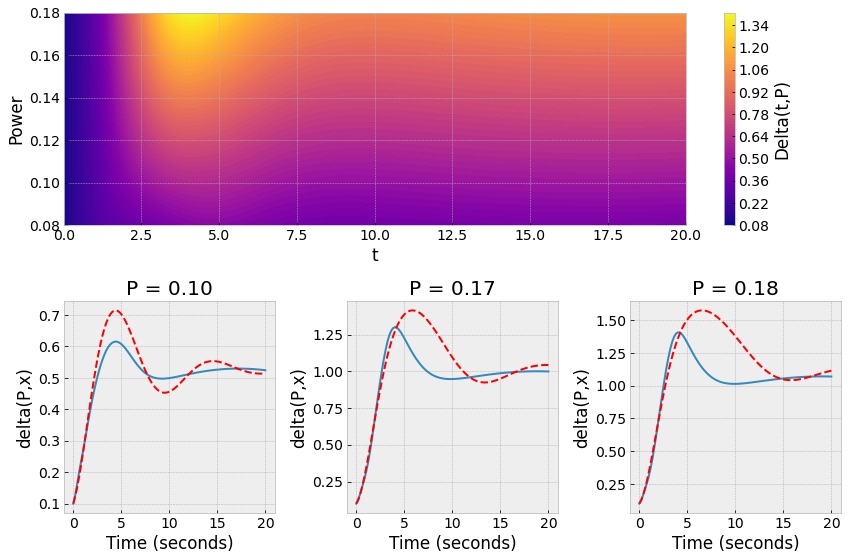

In [31]:
import os
# os.mkdir(os.path.join(os.getcwd(),'plots'))
plot_contour(basemodel, m=0.4, d=0.15, save=True, PSlice = [0.1, 0.17,0.18], savename = os.path.join(os.getcwd(),'plots','result.jpg'))